In [109]:
import pandas as pd
import re
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from enum import Enum

%matplotlib inline

In [110]:
csvLoc = "D:\\data analytics\\S2\\Ml lab\\dataset\\mbti_1.csv"
df=pd.read_csv(csvLoc)
pd.set_option('display.width', 150)
pd.set_option('display.max_colwidth', 115)
print('shape ',df.shape)
print(df.head())

shape  (8675, 2)
   type                                                                                                               posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||e...
1  ENTP  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position ofte...
2  INTP  'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my bl...
3  INTJ  'Dear INTP,   I enjoyed our conversation the other day.  Esoteric gabbing about the nature of the universe and ...
4  ENTJ  'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to un...


In [111]:
[p.split('|||') for p in df.head(1).posts.values]

[["'http://www.youtube.com/watch?v=qsXHcwe3krw",
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04

Text(0.5,0,'Types')

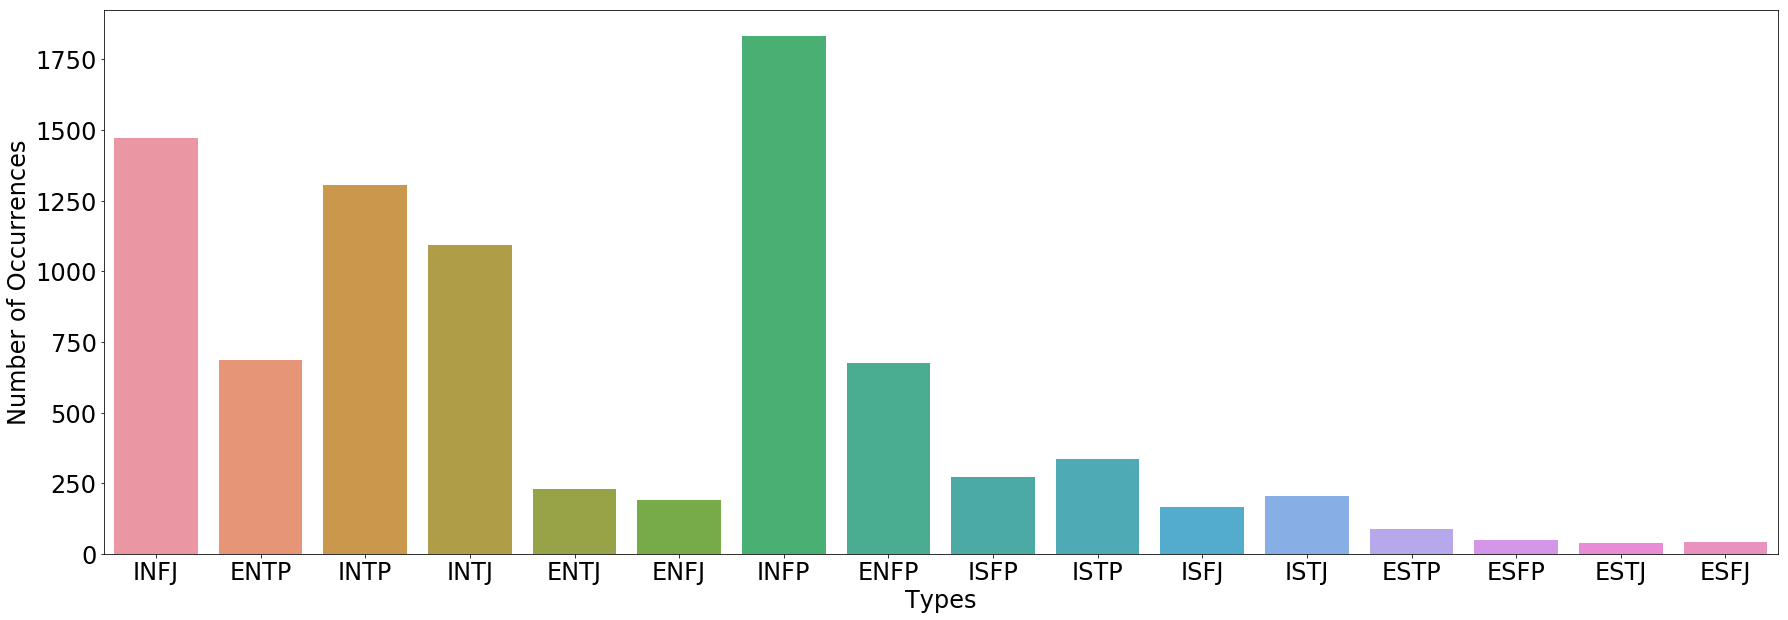

In [112]:
plt.figure(figsize=(30,10))
sns.countplot(data=df, x='type')
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)
plt.ylabel('Number of Occurrences', fontsize=24)
plt.xlabel('Types', fontsize=24)


In [113]:
types=["istj","isfj","infj","intj","istp","isfp","infp","intp","estp","esfp","entp","enfp","estj","esfj","enfj","entj"]
types_re = re.compile("|".join(types))
totalPst=mbtiPost=0
for val in df['posts']:
    posts=val.split("|||")
    totalPst += len(posts)
    for post in posts:
        if types_re.search(post):
            mbtiPost +=1
print("Total posts ",totalPst)
print("mbti posts ",mbtiPost)
print("remaining ",totalPst-mbtiPost)
        


Total posts  422845
mbti posts  5178
remaining  417667


having personality types inside set wouldn't affect result much because number of posts with personality type reference is low.

In [114]:
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)
print(lab_encoder.classes_)


['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


In [115]:
hyperlinkRe = r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))'''
tknzr = TweetTokenizer(preserve_case=False)
vocab = Counter()
wordnet_lemmatizer = WordNetLemmatizer()

#sample preprocessing
post=df['posts'][0]
print("======org=====")
print(post[0:500])

post=re.sub(hyperlinkRe,'', post) #remove hyperlink
print("=======remove hyperlink=====")
print(post[0:500])
#     post=tknzr.tokenize(post)
# #   print("===========tokenize=========")
# #   print(post)
post= re.sub(r'[^a-zA-Z]',' ',post)
post = re.sub(' +', ' ', post).lower()
print("===========spl car remove=========")
print(post[0:500])

post = " ".join([ wordnet_lemmatizer.lemmatize(x) for x in post.split(" ")])
print("===========lemmatize=========")
print(post[0:500])
#     for word in post:
#         vocab[word.lower()]+=1
#     postList[index]=post
# #     print(post)
     

======org=====
'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thin
=======remove hyperlink=====
' and intj moments    sportscenter not top ten plays    pranks|||What has been the most life-changing experience in your life?|||     On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~    ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. 

In [116]:
b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]
printList=[]
def translate_personality(personality):
    '''
    transform mbti to binary vector
    '''
    if(personality not in printList ):
        print("mbti : ",personality, " val: ",np.array([b_Pers[l] for l in personality]))
        printList.append(personality)
    return np.array([b_Pers[l] for l in personality])

In [117]:
Labels=Enum('Labels','MBTI I_E N_S F_T J_P',start=0)

def preProcessData(data, remove_stop_words=True):
    cachedStopWords = stopwords.words("english")
    list_personality = []
    list_posts = []
    len_data = len(data)

    for index,row in data.iterrows():
        if index % 500 == 0:
            print("%s | %s rows" % (index, len_data))

        ##### Remove and clean comments
        posts = row['posts']
        temp = re.sub(hyperlinkRe, ' ', posts)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +', ' ', temp).lower()
        if remove_stop_words:
            temp = " ".join([wordnet_lemmatizer.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
        else:
            temp = " ".join([ wordnet_lemmatizer.lemmatize(x) for x in post.split(" ")])
        list_posts.append(temp)
    list_posts=np.array(list_posts)
    
    #get labels
    list_personality_bin = np.array([translate_personality(p) for p in list(data['type'])])
    print("bin shape ",list_personality_bin.shape )
    print("personality bin")
    print(list_personality_bin)
    list_personality_split=np.transpose(list_personality_bin)
    print("split list shape ",list_personality_split.shape )
    print("split list")
    print(list_personality_split)
    list_personality_mbti = np.array(lab_encoder.transform(list(data['type'])))
    
    list_personality.append(list_personality_mbti)
    for plist in list_personality_split:
        list_personality.append(plist);
    list_personality=np.array(list_personality)
    print("done!")
    return list_posts, list_personality
    
list_posts, list_personality = preProcessData(df, remove_stop_words=True)   

0 | 8675 rows
500 | 8675 rows
1000 | 8675 rows
1500 | 8675 rows
2000 | 8675 rows
2500 | 8675 rows
3000 | 8675 rows
3500 | 8675 rows
4000 | 8675 rows
4500 | 8675 rows
5000 | 8675 rows
5500 | 8675 rows
6000 | 8675 rows
6500 | 8675 rows
7000 | 8675 rows
7500 | 8675 rows
8000 | 8675 rows
8500 | 8675 rows
mbti :  INFJ  val:  [0 0 0 0]
mbti :  ENTP  val:  [1 0 1 1]
mbti :  INTP  val:  [0 0 1 1]
mbti :  INTJ  val:  [0 0 1 0]
mbti :  ENTJ  val:  [1 0 1 0]
mbti :  ENFJ  val:  [1 0 0 0]
mbti :  INFP  val:  [0 0 0 1]
mbti :  ENFP  val:  [1 0 0 1]
mbti :  ISFP  val:  [0 1 0 1]
mbti :  ISTP  val:  [0 1 1 1]
mbti :  ISFJ  val:  [0 1 0 0]
mbti :  ISTJ  val:  [0 1 1 0]
mbti :  ESTP  val:  [1 1 1 1]
mbti :  ESFP  val:  [1 1 0 1]
mbti :  ESTJ  val:  [1 1 1 0]
mbti :  ESFJ  val:  [1 1 0 0]
bin shape  (8675, 4)
personality bin
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 ...
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 1]]
split list shape  (4, 8675)
split list
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 1 0 0]
 [0 1 1 ... 1

In [118]:
print(Labels.MBTI.value)
for i in range(0,5):
    print(lab_encoder.inverse_transform(list_personality[Labels.MBTI.value][i])," ",
          " ".join([b_Pers_list[x][list_personality[x+1][i]] for x in range(0,4)]),
          " ",list_posts[i][0:50])

0
INFJ   I N F J    intj moment sportscenter top ten play prank life 
ENTP   E N T P    finding lack post alarming sex boring position of
INTP   I N T P    good one course say know blessing curse absolutel
INTJ   I N T J    dear intp enjoyed conversation day esoteric gabbi
ENTJ   E N T J    fired another silly misconception approaching log


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

I_E
N_S
F_T
J_P
   type                posts I_E N_S F_T J_P
0  INFJ  'http://www.yout...   I   N   F   J
1  ENTP  'I'm finding the...   E   N   T   P
2  INTP  'Good one  _____...   I   N   T   P
3  INTJ  'Dear INTP,   I ...   I   N   T   J
4  ENTJ  'You're fired.||...   E   N   T   J


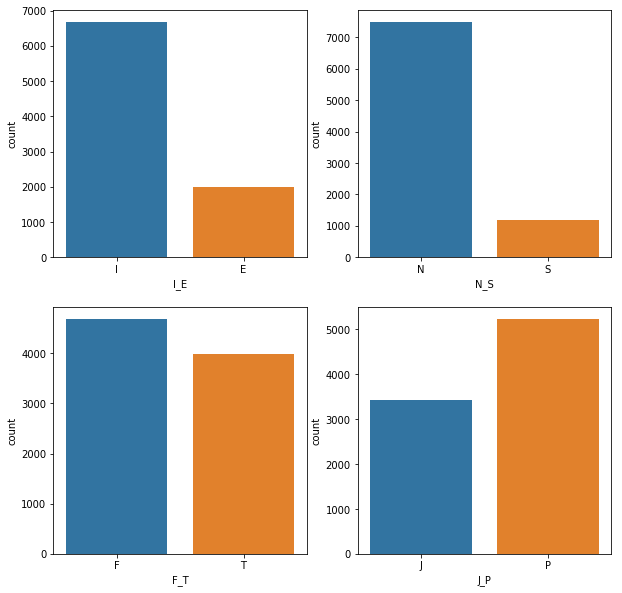

In [143]:
for i in range(1,5):
    name=Labels(i).name
    print(name)
    df[name]=list_personality[i]
    df[name]= df[name].map(lambda x: b_Pers_list[i-1][x] )
pd.set_option('display.max_colwidth', 20)
print(df.head())
f, ax = plt.subplots(2, 2,figsize=(10, 10))
ax=ax.flatten()
print(ax)
for i in range (0,4):
    sns.countplot(data=df,x=Labels(i+1).name,ax=ax[i])



In [74]:
#parameters
termCountLimit =0.9
maxVocab=50000

In [75]:
cntizer = CountVectorizer(max_df=termCountLimit, max_features=maxVocab)
#                             analyzer="word", 
#                              max_features=1500, 
#                              tokenizer=None,    
#                              preprocessor=None, 
#                              stop_words=None,  
# #                             ngram_range=(1,1),
#                              max_df=0.5,
#                              min_df=0.1) 
                                 
tfizer = TfidfTransformer()

X_cnt = cntizer.fit_transform(list_posts)
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
print("count vectorizer shape")
print(X_cnt.shape)
print("tfidf shape")
print(X_tfidf.shape)

count vectorizer shape
(8675, 50000)
tfidf shape
(8675, 50000)


In [76]:
reverse_dic = {}
for key in cntizer.vocabulary_:
    reverse_dic[cntizer.vocabulary_[key]] = key
top_50 = np.asarray(np.argsort(np.sum(X_cnt, axis=0))[0,-50:][0, ::-1]).flatten()
[reverse_dic[v] for v in top_50]

['feel',
 'type',
 'make',
 'much',
 'well',
 'say',
 'friend',
 'love',
 'way',
 'want',
 'good',
 'see',
 'something',
 'also',
 'lot',
 'go',
 'even',
 'always',
 'life',
 'someone',
 'could',
 'never',
 'though',
 'find',
 'year',
 'thought',
 'need',
 'infp',
 'actually',
 'person',
 'right',
 'work',
 'going',
 'first',
 'sure',
 'yes',
 'infj',
 'pretty',
 'mean',
 'intj',
 'feeling',
 'day',
 'take',
 'come',
 'guy',
 'still',
 'post',
 'thread',
 'look',
 'said']

In [ ]:
mlNB = MultinomialNB()